<a href="https://colab.research.google.com/github/syadali/CNIT483/blob/main/483Lab1_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1: Linear Regression**

The lab report will be due by **September 13th, 2024**.

Please submit the ipynb file of your lab via the link in Brightspace.

##**Problem 1**
In this problem, we will explore the basic linear regression: $y_n=w_0 +w_1x_n$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$ and $w_1$ for the given data samples in Lab1_1.csv.

Requirments:
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$ and $w_1$, (3) the obtained training error, and (4) the obtained testing error.

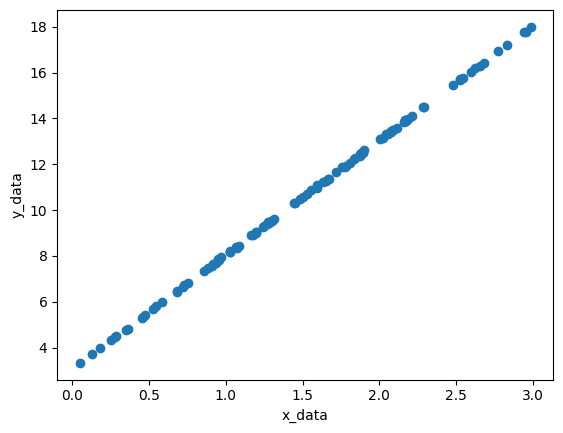

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
# import python libs
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Training and Testing Data
r = np.random.RandomState(123)
x_data = 3 * r.rand(100)
y_data = 5 * x_data + 3 + 0.1 * r.rand(100) # w_1 = 5, w_0 = 3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
plt.scatter(x_data, y_data)
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.show()

# Obtain your data samples
data=pd.read_csv('/content/sample_data/Lab1_1.csv')
x_data = data['x'].values
y_data = data['y'].values

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples).
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))
model.summary()

In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2000,
                    validation_data=(x_test, y_test))

Epoch 1/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 4.8357 - mean_absolute_error: 4.8357 - val_loss: 5.2419 - val_mean_absolute_error: 5.2419
Epoch 2/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7846 - mean_absolute_error: 4.7846 - val_loss: 5.2372 - val_mean_absolute_error: 5.2372
Epoch 3/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9200 - mean_absolute_error: 4.9200 - val_loss: 5.2322 - val_mean_absolute_error: 5.2322
Epoch 4/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9859 - mean_absolute_error: 4.9859 - val_loss: 5.2273 - val_mean_absolute_error: 5.2273
Epoch 5/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7905 - mean_absolute_error: 4.7905 - val_loss: 5.2225 - val_mean_absolute_error: 5.2225
Epoch 6/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7708 - mean_absolute_error: 4.7708 - val_loss: 5.2177 - val_mean_absolute_error: 5.2177
Epoch 7/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9003 - mean_absolute_error: 4.9003 - val_loss: 5.2

In [ ]:
# Print weight w_1 and bias w_0
W = model.layers[1].get_weights()
print(W)

[array([[-3.0122383]], dtype=float32), array([5.0044274], dtype=float32)]


2/2 - 0s - 10ms/step - loss: 0.0409 - mean_absolute_error: 0.0409
0.040876977145671844


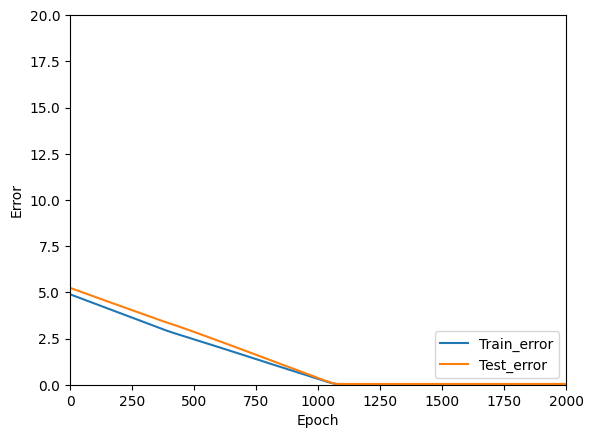

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 2**
In this problem, we will explore an extended linear regression: $y_n=w_0 +w_1x_n+w_2x_n^2$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$, $w_1$, and $w_2$ for the given data samples in Lab1_2.csv.

Requirments:
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, and $w_2$, (3) the obtained training error, and (4) the obtained testing error.

In [ ]:
# import python libs
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Obtain your data samples
data = pd.read_csv('/content/sample_data/Lab1_2.csv')
x_data = data['x'].values
y_data = data['y'].values
x_squareddata = x_data ** 2

# Merge
X = np.column_stack((x_data, x_squareddata))

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples).
x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3)

model = models.Sequential()
model.add(layers.Normalization(input_shape=(2,), axis=None)) # 2 inputs now x and x^2
model.add(layers.Dense(1)) # (y)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 2)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer= adam, loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=2000, validation_split= 0.3, verbose=0)

In [ ]:
# Print weight w_1, w_2 and bias w_0
weights = model.layers[1].get_weights()
w1 = weights[0][0] # for x
w2 = weights[0][1] # for x^2
w0 = weights[1][0] # Bias
print(f"w0: {w0}, w1: {w1}, w2: {w2}")

w0: -2.954941749572754, w1: [1.9762148], w2: [5.007114]


Training Error: 0.0002738527546171099 Testing Error: 0.0002982273872476071


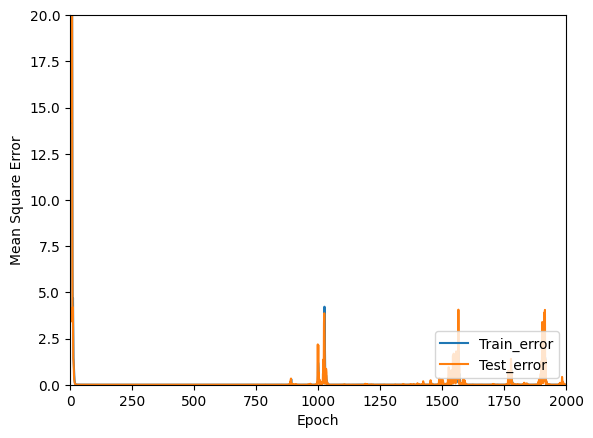

In [ ]:

train_error = model.evaluate(x_train, y_train, verbose=0)
test_error = model.evaluate(x_test, y_test, verbose=0)
print(f"Training Error: {train_error}", f"Testing Error: {test_error}" )

# Visualize performance evaluation
plt.plot(history.history['loss'], label='Train_error')
plt.plot(history.history['val_loss'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')
plt.show()


##**Problem 3**
In this problem, we will explore to use extended linear regression: $y_n=w_0 +\sum_{k=1}^Kw_kx_{n,k}$ to solve a real-world problem on stock forecasting. Your task is predict the Close value based on the Open, High, and Low values given in Lab1_3.csv.  
Requirments:
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, ..., $w_K$ , (3) the obtained training error, and (4) the obtained testing error.

In [ ]:
# print python libs
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Import Data
data=pd.read_csv('sample_data/Lab1_3.csv')
x_data = data[['Open','High','Low']]
y_data = data['Close']

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples).
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

model = models.Sequential()
model.add(layers.Normalization(input_shape=(3,), axis=None)) # 3 inputs now
model.add(layers.Dense(1)) # 1 output
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization)      │ (None, 3)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer= adam, loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=2000, validation_split= 0.3, verbose=0)

In [ ]:
# Print weight w_1, w_2 and bias w_0
weights = model.layers[1].get_weights()
w_open, w_high, w_low = weights[0][:, 0]
w0 = weights[1][0] # Bias
print(f"w0: {w0}, w_open: {w_open}, w_high: {w_high}")

w0: -1.1294230222702026, w_open: -0.5748424530029297, w_high: 0.8768472671508789


Training Error: 28.45596694946289 Testing Error: 41.92448806762695


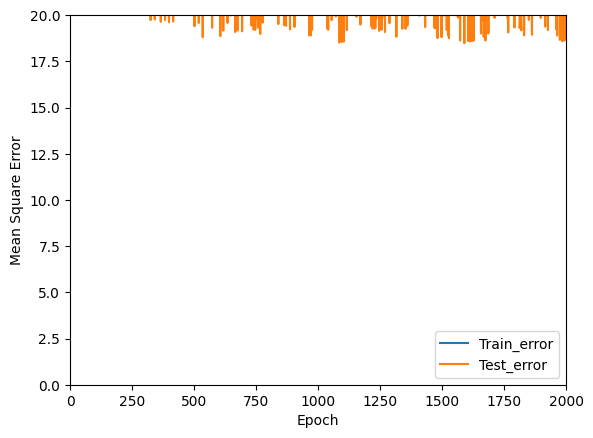

In [ ]:
train_error = model.evaluate(x_train, y_train, verbose=0)
test_error = model.evaluate(x_test, y_test, verbose=0)
print(f"Training Error: {train_error}", f"Testing Error: {test_error}" )

# Visualize performance evaluation
plt.plot(history.history['loss'], label='Train_error')
plt.plot(history.history['val_loss'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')
plt.show()